<a href="https://colab.research.google.com/github/Pamschimalesky/challengsprint4/blob/main/C%C3%B3pia_de_globalsolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:#9B59B6"> Projeto da Global Solution</span>


# <span style="color:#9B59B6">  1. Business Understanding </span>  

Construir um modelo que preveja a chance de ataque cardiaco.


## <span style="color:#9B59B6"> 2. Etapa de Preparação

#### 3.1 Datasets utilizados:
O Dataset <a href="https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression/data">Logistic regression To predict heart disease</a> foi retirado do site Kaggle.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## DATA UNDERSTANDING


In [ ]:
df = pd.read_csv("/content/framingham.csv")

### EDA - Análise Exploratória de Dados

Visualizando as informações do dataset de forma geral:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


É possível visualizar os tipos de dados na função acima. São estes: float e int. Não há object à ser visualizado.
Também vale observar que estes são não-nulos (non-null).

Visualizando o dataframe:

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Finalmente, agora vamos realizar uma visualização estatística do dataset:

In [ ]:
df.describe().round(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.00,4238.00,4133.00,4238.00,4209.00,4185.00,4238.00,4238.00,4238.00,4188.00,4238.00,4238.00,4219.00,4237.00,3850.00,4238.00
mean,0.43,49.58,1.98,0.49,9.00,0.03,0.01,0.31,0.03,236.72,132.35,82.89,25.80,75.88,81.97,0.15
std,0.50,8.57,1.02,0.50,11.92,0.17,0.08,0.46,0.16,44.59,22.04,11.91,4.08,12.03,23.96,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,0.00,42.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00,0.00
50%,0.00,49.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.40,75.00,78.00,0.00
75%,1.00,56.00,3.00,1.00,20.00,0.00,0.00,1.00,0.00,263.00,144.00,89.88,28.04,83.00,87.00,0.00
max,1.00,70.00,4.00,1.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


###Visualizando a correlação de ataques cardiacos:

Vamos analisar quais as correlações mais fortes com a possibilidade de ter um ataque cardiaco.

In [ ]:
df.corr()[['TenYearCHD']].sort_values(by='TenYearCHD',ascending=False)


,TenYearCHD
TenYearCHD,1.000000
age,0.225256
sysBP,0.216429
prevalentHyp,0.177603
diaBP,0.145299
glucose,0.125544
diabetes,0.097317
male,0.088428
BPMeds,0.087489
totChol,0.082184


####<b>Conclusão:</b>

Vamos analisar as correlações mais fortes e mais fracas entre a variável "TenYearCHD" (indicando a presença de doença cardíaca nos próximos 10 anos) e as demais variáveis.

* Correlações Mais Fortes:

Idade (age):

Correlação: 0.225256 (correlação positiva moderada)

A correlação positiva moderada sugere que à medida que a idade aumenta, o risco de desenvolver doença cardíaca nos próximos 10 anos também tende a aumentar. Isso é consistente com o entendimento geral de que o envelhecimento está associado a um maior risco cardiovascular.

Pressão Sanguínea Sistólica (sysBP):

Correlação: 0.216429 (correlação positiva moderada)

Indica que níveis mais elevados de pressão sanguínea sistólica estão associados a um aumento no risco de doença cardíaca nos próximos 10 anos. A pressão sanguínea elevada é um fator de risco bem conhecido para doenças cardiovasculares.

Hipertensão Prevalente (prevalentHyp):

Correlação: 0.177603 (correlação positiva fraca)

A presença de hipertensão (pressão arterial elevada) está associada a um aumento no risco de doença cardíaca nos próximos 10 anos. Este é outro indicador consistente, uma vez que a hipertensão é um fator de risco cardiovascular significativo.

Pressão Sanguínea Diastólica (diaBP):

Correlação: 0.145299 (correlação positiva fraca)

Indica que níveis mais elevados de pressão sanguínea diastólica também estão associados a um aumento no risco de doença cardíaca. Ambas as pressões sanguíneas sistólica e diastólica são consideradas importantes indicadores de saúde cardiovascular.

Glicose (glucose):

Correlação: 0.125544 (correlação positiva fraca)

Sugere que níveis mais elevados de glicose no sangue estão associados a um aumento no risco de doença cardíaca nos próximos 10 anos. A relação entre diabetes e doença cardíaca é bem estabelecida, e a glicose é um marcador relevante.

* Correlações Mais Fracas:

Educação (education): Com uma correlação negativa fraca de -0.054059, indica uma relação inversa entre níveis mais altos de educação e o risco de desenvolver doença cardíaca nos próximos 10 anos. No entanto, a correlação é relativamente fraca, e outros fatores podem estar influenciando essa relação.

Frequência Cardíaca (heartRate): Com uma correlação positiva muito fraca de 0.022913, sugere que não há uma relação linear forte entre a frequência cardíaca e o risco de doença cardíaca nos próximos 10 anos.


###Gráficos


Grafico 1

Dado que a idade aumentada está relacionada ao maior risco de doença cardiaca de acordo com os dados de correlação acima, vamos agora visualizar um gráfico entre idade x colesterol:

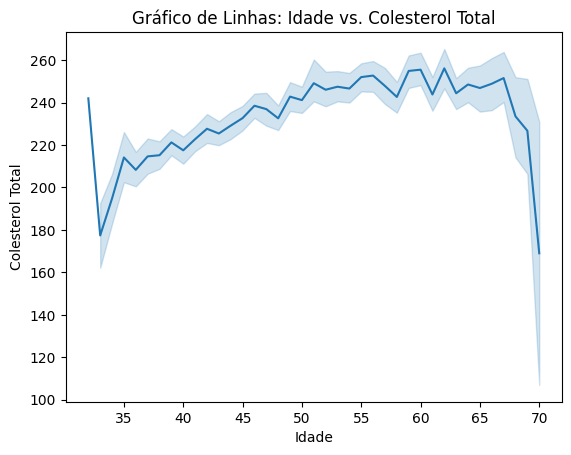

In [ ]:
sns.lineplot(x='age', y='totChol', data=df)
plt.xlabel('Idade')
plt.ylabel('Colesterol Total')
plt.title('Gráfico de Linhas: Idade vs. Colesterol Total')
plt.show()


Os níveis de colesterol atingem um pico maior entre 60 e 65 anos

In [ ]:
# Agrupa o DataFrame por idade e calcula a média do colesterol total
mean_cholesterol_by_age = df.groupby('age')['totChol'].mean().reset_index()

# Encontra a idade com a maior média de colesterol
max_mean_age = mean_cholesterol_by_age.loc[mean_cholesterol_by_age['totChol'].idxmax()]['age']

# Exibe a idade com a maior média de colesterol
print(f'A idade com a maior média de colesterol é: {max_mean_age}')

A idade com a maior média de colesterol é: 62.0


Gráfico 2:

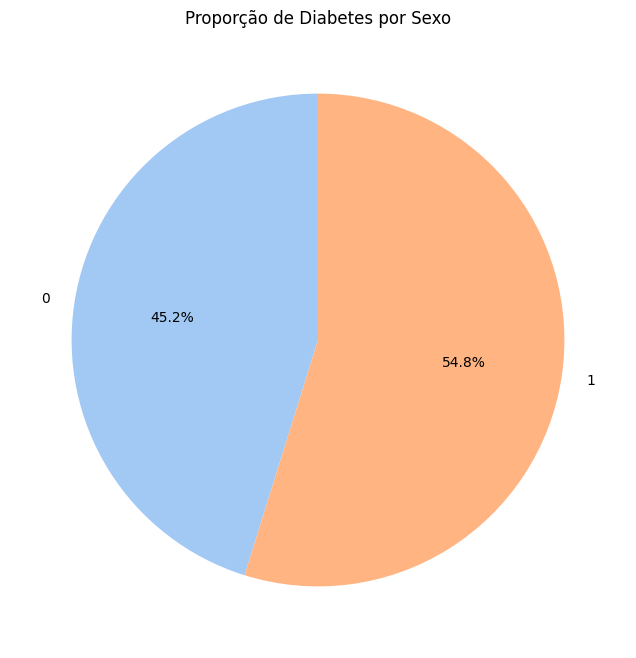

In [ ]:
# Cria um DataFrame contendo a média de diabetes para cada sexo
diabetes_by_sex = df.groupby('male')['diabetes'].mean().reset_index()

# Renomeia as colunas para melhor legibilidade
diabetes_by_sex.rename({'male': 'Sexo', 'diabetes': 'Média de Diabetes'}, axis=1, inplace=True)

# Plota o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(diabetes_by_sex['Média de Diabetes'], labels=diabetes_by_sex['Sexo'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proporção de Diabetes por Sexo')
plt.show()



A média de diabetes em homens é um pouco maior, mas nem tanto.

Grafico 3


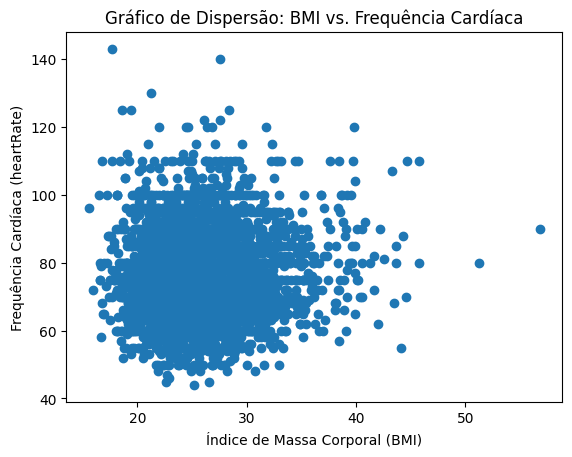

In [ ]:
# Gráfico de dispersão para BMI vs. heartRate
plt.scatter(df['BMI'], df['heartRate'])
plt.xlabel('Índice de Massa Corporal (BMI)')
plt.ylabel('Frequência Cardíaca (heartRate)')
plt.title('Gráfico de Dispersão: BMI vs. Frequência Cardíaca')
plt.show()


In [ ]:
# Calcular a correlação entre BMI e heartRate
correlacao_bmi_heart_rate = df['BMI'].corr(df['heartRate'])

# Exibir o resultado
print(f"A correlação entre Índice de Massa Corporal (BMI) e Frequência Cardíaca (heartRate) é: {correlacao_bmi_heart_rate}")


A correlação entre Índice de Massa Corporal (BMI) e Frequência Cardíaca (heartRate) é: 0.06767843428309366


O Índice de Massa Corporal (BMI) e a Frequência Cardíaca (heartRate) estão relacionados de forma bem superficial, ou seja, enquanto que o valor positivo sugere que se um valor aumenta, o outro também, ao mesmo tempo a correlação entre ambos valores é fraca. Ou seja, uma variável não afeta a outra com base apenas na correlação.

No gráfico também é possível notar que há valores altos como +140 de frequencia cardiaca, que estão relacionados à um indice de massa corporal menor, como também há valor de em torno de 80 de frequencia, relacionado à uma massa corporal maior (em torno de 50).

<b>Conclusão:</b> O índice de massa corporal e a frequência cardíaca não afetam muito um ao outro.

Grafico 4

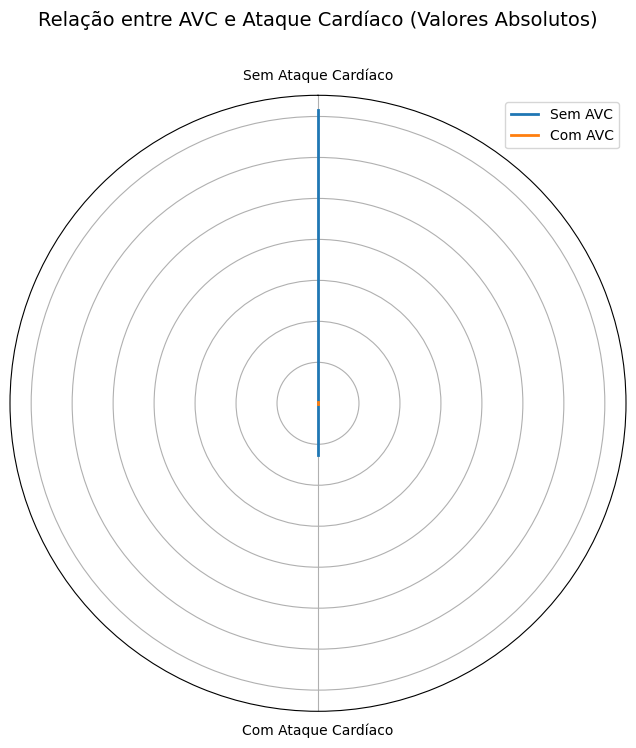

In [ ]:
# Preparar os dados
categories = ['Sem Ataque Cardíaco', 'Com Ataque Cardíaco']
values_no_stroke = [3580, 633]
values_stroke = [14, 11]

# Criar o gráfico de radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Angulos para cada categoria
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

# Adicionar as categorias ao gráfico de radar
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

# Gráfico para Sem AVC
ax.plot(angles, values_no_stroke, label='Sem AVC', linestyle='solid', linewidth=2)
ax.fill(angles, values_no_stroke, alpha=0.4)

# Gráfico para Com AVC
ax.plot(angles, values_stroke, label='Com AVC', linestyle='solid', linewidth=2)
ax.fill(angles, values_stroke, alpha=0.4)

# Adicionar rótulos
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(categories)

# Adicionar legenda
ax.legend()

# Adicionar título
plt.title('Relação entre AVC e Ataque Cardíaco (Valores Absolutos)', size=14, y=1.1)

# Exibir o gráfico
plt.show()


Quem teve AVC não tem maiores chances de ter Ataque Cardiaco, assim como quem tem Ataque Cardiaco não tem maiores chances de AVC.

Gráfico 5

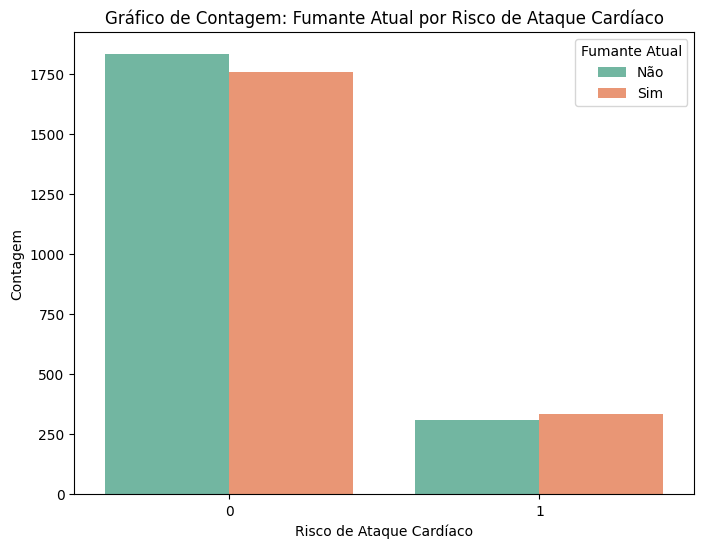

In [ ]:
# Gráfico de contagem para Fumante Atual por Risco de Ataque Cardíaco
plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', hue='currentSmoker', data=df, palette='Set2')
plt.xlabel('Risco de Ataque Cardíaco')
plt.ylabel('Contagem')
plt.title('Gráfico de Contagem: Fumante Atual por Risco de Ataque Cardíaco')
plt.legend(title='Fumante Atual', labels=['Não', 'Sim'])
plt.show()


O fato de estar ou não fumando não afeta muito no risco de ataque cardiaco.

## DATA PREPARATION

Quantidade de dados faltantes

In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
mediaCigarrosPorDia = df[df['currentSmoker']==1]['cigsPerDay'].mean()

In [ ]:
df['cigsPerDay'].fillna(mediaCigarrosPorDia, inplace=True)

In [ ]:
df['education'].fillna(df['education'].median(), inplace=True)

<Axes: >

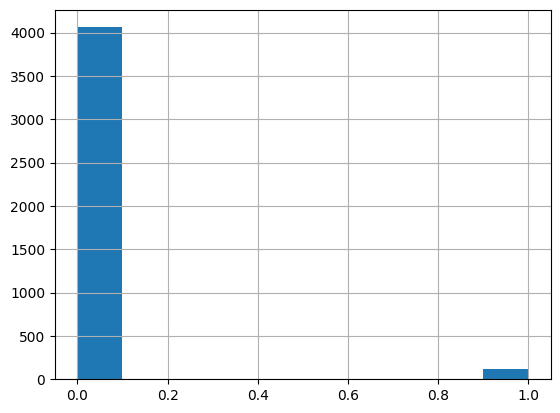

In [ ]:
df['BPMeds'].hist()

In [ ]:
df['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)

In [ ]:
df['totChol'].fillna(df['totChol'].median(), inplace=True)

In [ ]:
df['BMI'].fillna(df['BMI'].median(), inplace=True)

In [ ]:
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)

In [ ]:
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Tratando variavel numerica


In [ ]:
scaler = MinMaxScaler()
y = df['TenYearCHD']
X = df.drop(columns='TenYearCHD')
X_scaled = scaler.fit_transform(X)

## MODELO SUP - MODELO LOGISTIC REGRESSION

Dados teste e treino (Train Test Split).

In [ ]:
# treino de regressao
import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

score = model.evaluate(X_test, y_test, verbose=0)

print('Acurácia:', score[1])


Epoch 1/10
93/93 [==============================] - 1s 3ms/step - loss: 0.4735 - accuracy: 0.8257
Epoch 2/10
93/93 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8463
Epoch 3/10
93/93 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.8466
Epoch 4/10
93/93 [==============================] - 0s 4ms/step - loss: 0.3981 - accuracy: 0.8469
Epoch 5/10
93/93 [==============================] - 0s 4ms/step - loss: 0.3958 - accuracy: 0.8483
Epoch 6/10
93/93 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8479
Epoch 7/10
93/93 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8486
Epoch 8/10
93/93 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.8513
Epoch 9/10
93/93 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8520
Epoch 10/10
93/93 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8517
Acurácia: 0.8584905

#### <b>Conclusão: </b>
* O modelo teve score de <b>85,6%</b>

In [ ]:
#salvando modelo
model.save('modelo-regressao.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# MODELO NÃO SUPERVISIONADO

### MODELO DE CLUSTERING

In [ ]:
#selecionando dados
df1 = df.iloc[:,5:9]
df1


,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0.0,0,0,0
1,0.0,0,0,0
2,0.0,0,0,0
3,0.0,0,1,0
4,0.0,0,0,0
...,...,...,...,...
4233,0.0,0,1,0
4234,0.0,0,0,0
4235,0.0,0,0,0
4236,0.0,0,0,0


In [ ]:
#inicializar variáveis distorcoes e K
distorcoes = []
K = range(1, 10)

for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df1)
    distorcoes.append(modelo01.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
distorcoes

[1158.7715903727794,
 242.58309824432402,
 129.91408172342437,
 57.81321195099376,
 32.812803787728875,
 19.813557681136977,
 11.43585782138943,
 4.861944777911166,
 0.979591836734694]

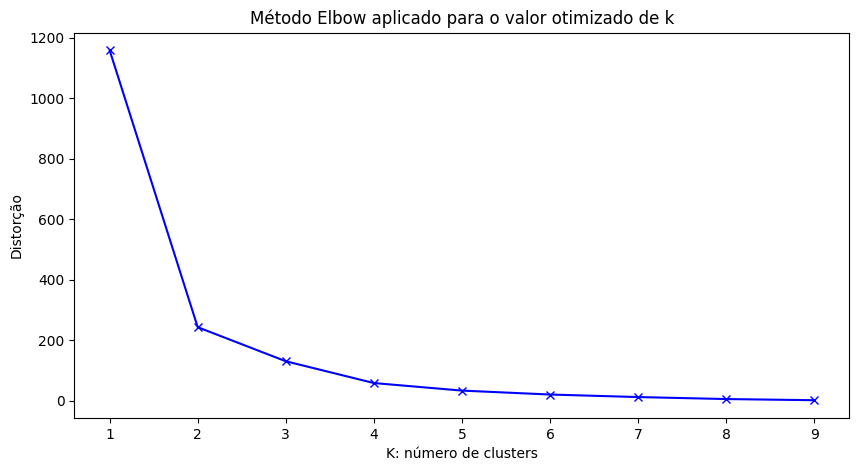

In [ ]:
# Plotar gráficos
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

# Define os labels do eixos do gráfico:
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Define um título para o gráfico:
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostra o gráfico:
plt.show()

O gráfico mostra um cotovelo claro no ponto K = 3. Portanto, o número ideal de clusters para esse conjunto de dados é 3.

In [ ]:
#Creando kmeans model

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
#Criando coluna de grupo de pacientes
df1['Grupo de Pacientes'] = kmeanModel.predict(df1)

In [ ]:
df1

,BPMeds,prevalentStroke,prevalentHyp,diabetes,Grupo de Pacientes
0,0.0,0,0,0,0
1,0.0,0,0,0,0
2,0.0,0,0,0,0
3,0.0,0,1,0,1
4,0.0,0,0,0,0
...,...,...,...,...,...
4233,0.0,0,1,0,1
4234,0.0,0,0,0,0
4235,0.0,0,0,0,0
4236,0.0,0,0,0,0


In [ ]:
# Verificando o Silhoutte Score do modelo:
labels = kmeanModel.labels_
silhouette = silhouette_score(df1, labels, metric = 'euclidean')
print(f'A Silhoutte Score para o modelo é: {silhouette: .2f}.')

A Silhoutte Score para o modelo é:  0.96.


### Conclusão:

Silhouette Score (0.96):

O Silhouette Score é uma métrica que varia de -1 a 1. Quanto mais próximo de 1, melhor é a qualidade do clustering. O valor 0.96 sugere que os clusters estão muito bem definidos e que as instâncias dentro de cada cluster estão muito próximas umas das outras.


In [ ]:
import pickle

# Salvando o modelo
with open('modelo_kmeans.pkl', 'wb') as f:
    pickle.dump(kmeanModel, f)
